# Car Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test= pd.read_csv("test_car_details.csv")
df_train = pd.read_csv("train_car_details.csv")

In [3]:
print(df_train.columns)
print(df_test.columns)

Index(['Id', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'torque', 'seats'],
      dtype='object')
Index(['Id', 'name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


## Objetivo

Um dos problemas que ocorrem na OLX da Índia, pela baixa volumetria de dados, é a empresa não conseguir estimar um preço de venda para o carro do seu cliente baseado em algumas características do veículo. O objetivo é estimar tal valor a partir de dados do concorrente (CarDekho).

## Análise qualitativa e quantitativa dos dados

In [4]:
#Verificando as variáveis
df_train.head()

,Id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Hyundai Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
1,2,Maruti Ertiga VDI,2012,459999,87000,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm,7.0
2,3,BMW 3 Series 320d Luxury Line,2010,1100000,102000,Diesel,Dealer,Automatic,First Owner,19.62 kmpl,1995 CC,187.74 bhp,400Nm@ 1750-2500rpm,5.0
3,4,Tata New Safari DICOR 2.2 EX 4x2,2009,229999,212000,Diesel,Individual,Manual,Third Owner,11.57 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0
4,5,Toyota Fortuner 3.0 Diesel,2010,800000,125000,Diesel,Individual,Manual,Second Owner,11.5 kmpl,2982 CC,171 bhp,343Nm@ 1400-3400rpm,7.0


In [5]:
df_train = df_train.iloc[:,1:] #retirando a coluna de id

Id = df_test.Id
df_test = df_test.iloc[:,1:] #retirando a coluna de id

### Analise de dados nulos

In [6]:
#Verificado a quantidade de NaN por atributo
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          157
engine           157
max_power        151
torque           158
seats            157
dtype: int64

In [7]:
#Porcentagem de nan por atributo
print(100*df_train.isna().sum()/len(df_train))

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.759712
engine           2.759712
max_power        2.654245
torque           2.777290
seats            2.759712
dtype: float64


In [8]:
#Porcentagem de nan por atributo no test
print(100*df_test.isna().sum()/len(df_test))

name            0.0
year            0.0
km_driven       0.0
fuel            0.0
seller_type     0.0
transmission    0.0
owner           0.0
mileage         0.0
engine          0.0
max_power       0.0
torque          0.0
seats           0.0
dtype: float64


Pelo fatos dos NaN's estar majoritariamente presente nas mesmas linhas e por representar um baixo volume em relação ao total (menos de 3%), tais linhas serão retiradas.

In [9]:
print(f'Quantidade de linhas totais: ', df_train.shape[0])
# Remove as linhas com NaN
df_train = df_train.dropna(axis=0)   
print(f'Quantidade de linhas após retirada dos NaNs: ', df_train.shape[0])
#Aproximadamente 3% de linhas eliminadas

Quantidade de linhas totais:  5689
Quantidade de linhas após retirada dos NaNs:  5531


### Categoria das variaveis

Os dados são compostos pelas variáveis:


* Variaveis quantitativas discreta:<br>
 * Ano de fabricacao do carro (year)
 * Qtd de Km dirigidos (km_driven)
 * Potência máxima do motor (max_power)
 * Qtd de acentos (seats)
* Variaveis quantitativas continuas:
 * Quilometragem por litro (mileage)
 * Potencia do motor (engine)
 * Preço de venda (selling_price) **Valor a ser predito**
* Variaveis qualitativas nominais:
 * nome do carro (name)
 * tipo de combustivel utilizado (fuel)
 * tipo de vendendor (seller_type)
 * transmissao (transmission)
 * Torque: responsável pela capacidade do motor produzir força motriz, ou seja, o movimento giratório
* Variaveis qualitativas ordinais:
 * Quantos donos ja possuiram o carro (owner)

Nota-se que 4 variáveis são numéricas, mas é necessário uma tratativa para retirar as strings que representam a unidade de medida. Ao todo, considerando as variáveis que precisam ser tratadas, há 7 variáveis numéricas e 6 variáveis categóricas qualitativas.

### Retirando a palavra owner da coluna owner, retirando a unidade de medida de mileage, engine e max power e retirando a segunda unidade de medida utilizada no torque (rpm) e deixando apenas a unidade Nm

In [10]:
df1 = df_train.copy()

In [11]:
colunas = ['owner', 'mileage', 'engine',
       'max_power', 'torque']

In [12]:
#base de treino
for i in colunas:
  df1[i] = df1[i].str.split(' ').str[0]

#Na base de test
for i in colunas:
  df_test[i] = df_test[i].str.split(' ').str[0]

### Retirando a unidade de medida do torque

In [13]:
#Retirando a unidade de medida do torque 
df1['torque'] = df1['torque'].str.replace('Nm@', '', regex=True).replace('nm@', '', regex=True).replace('@', '', regex=True).replace('Nm', '', regex=True).replace('NM', '', regex=True).replace('kgm', '', regex=True)

#no test
df_test['torque'] = df_test['torque'].str.replace('Nm@', '', regex=True).replace('nm@', '', regex=True).replace('@', '', regex=True).replace('Nm', '', regex=True).replace('NM', '', regex=True).replace('kgm', '', regex=True)

In [14]:
df1[df1['torque'] == '110(11.2)']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1954,Honda Jazz Select Edition Active,2011,350000,80000,Petrol,Individual,Manual,Second,16.0,1198,90,110(11.2),5.0


Nao temos esse problema na base de teste

#### Tratando a linha com torque (11.2) no treino

In [15]:
#eliminando a linha com toque = 110(11.2)
df1.drop(df1.loc[df1['torque'] == '110(11.2)'].index, inplace=True)

#### Tratando linha 380(38.7) no torque (base teste)

In [16]:
df_test[df_test['torque'] == '380(38.7)']

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
885,Ford Endeavour Hurricane Limited Edition,2013,110000,Diesel,Individual,Automatic,Third,12.8,2953,156,380(38.7),7.0


Nao podemos eliminar linhas da base de teste


In [17]:
df_test[df_test['torque'] == '380(38.7)']

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
885,Ford Endeavour Hurricane Limited Edition,2013,110000,Diesel,Individual,Automatic,Third,12.8,2953,156,380(38.7),7.0


In [18]:
df_test.torque.replace('380(38.7)', '380', inplace= True)

In [19]:
df_test[df_test['torque'] == '380(38.7)']

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


#### Analisando nome dos carros

In [20]:
#Colocando a marca e modelo do carro em um dicionario juntamente com sua frequência no conjunto 
import collections
agrupamento = df1['name']
counter=collections.Counter(agrupamento)

In [21]:
#Colocando a frequencia em uma lista para poder contar a qtd de itens diferentes
contador = []
for i in sorted(counter, key = counter.get, reverse = True):
    contador.append(counter[i])
print("Quantidade de modelos de carros distintos: ",len(contador))
print("A maior quantidade de um único modelo de carro: ",max(contador))

Quantidade de modelos de carros distintos:  1706
A maior quantidade de um único modelo de carro:  92


Como o nome dos carros é muito variado, não é interessante estar presente no modelo, porém, a informação da marca do carro pode ser importante, assim como outras informações oriundas da própria base.

## Feature engineering

### Criando a feature marca

In [22]:
#Criando a coluna marca
df1['brand'] = df1['name'].str.split(' ').str[0]

#para a base de teste
df_test['brand'] = df_test['name'].str.split(' ').str[0]

In [23]:
df1['brand'].unique()

array(['Maruti', 'BMW', 'Tata', 'Toyota', 'Hyundai', 'Chevrolet', 'Honda',
       'Jaguar', 'Renault', 'Mahindra', 'Volkswagen', 'Ford', 'Skoda',
       'Datsun', 'Fiat', 'Volvo', 'Nissan', 'Mercedes-Benz', 'Kia',
       'Jeep', 'Audi', 'Isuzu', 'Lexus', 'Land', 'Force', 'Mitsubishi',
       'Ambassador', 'Daewoo', 'MG', 'Ashok'], dtype=object)

In [24]:
df_test['brand'].unique()

array(['Tata', 'Maruti', 'Mahindra', 'Hyundai', 'Volvo', 'Jaguar',
       'Chevrolet', 'Jeep', 'Honda', 'Toyota', 'Kia', 'Ford', 'Lexus',
       'Skoda', 'BMW', 'Fiat', 'Renault', 'Nissan', 'Datsun',
       'Mercedes-Benz', 'Volkswagen', 'Opel', 'Mitsubishi', 'Ambassador',
       'Audi', 'Land', 'Isuzu', 'Force'], dtype=object)

### Criando a coluna idade do carro

In [25]:
#Criando a coluna idade do carro
df1['age'] = 2021 - df1.year

#para a base de teste
df_test['age'] = 2021 - df_test.year

### Retirando a coluna name e year

In [26]:
del df1["name"] #retirando a coluna name
del df1["year"] #retirando a coluna year
del df1["torque"] #retirando a coluna year ## 0.9705529686331869 (sem torque) gradiente
#del df1["seats"] #retirando a coluna year ## 0.9719490890165687 (sem seats e torque) gradiente
#del df1["engine"] #retirando a coluna year ### 0.9723490022839645 (sem engine, seats e torque) gradiente


del df_test["name"] #retirando a coluna name
del df_test["year"] #retirando a coluna year
del df_test["torque"] #retirando a coluna torque
#del df_test["seats"] #retirando a coluna year
#del df_test["engine"] #retirando a coluna year

### Adequando o tipo de dado de algumas variáveis

In [27]:
#Mudando o tipo de dado de algumas variáveis
df1['mileage'] = pd.to_numeric(df1['mileage'])
df1['max_power'] = pd.to_numeric(df1['max_power'])
df1['engine'] = pd.to_numeric(df1['engine']) 
df1['seats'] = pd.to_numeric(df1['seats']) 
#df1['torque'] = pd.to_numeric(df1['torque'])  

#Base de Teste
df_test['mileage'] = pd.to_numeric(df_test['mileage'])
df_test['max_power'] = pd.to_numeric(df_test['max_power'])
df_test['engine'] = pd.to_numeric(df_test['engine'])
df_test['seats'] = pd.to_numeric(df_test['seats']) 
#df_test['torque'] = pd.to_numeric(df_test['torque']) 

## Transformar as variaveis categoricas para a regressão

### Substituicao variaveis categoricas por rótulos numéricos


In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#base de treino
for i in range(0, len(df1.columns.values)):
  if df1.dtypes[i] == 'O':
    df1.iloc[:, i] = le.fit_transform(df1.iloc[:, i]).astype('str')

#Na base de test
for i in range(0, len(df_test.columns.values)):
  if df_test.dtypes[i] == 'O':
    df_test.iloc[:, i] = le.fit_transform(df_test.iloc[:, i]).astype('str')

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5530 entries, 1 to 5688
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  5530 non-null   int64  
 1   km_driven      5530 non-null   int64  
 2   fuel           5530 non-null   object 
 3   seller_type    5530 non-null   object 
 4   transmission   5530 non-null   object 
 5   owner          5530 non-null   object 
 6   mileage        5530 non-null   float64
 7   engine         5530 non-null   int64  
 8   max_power      5530 non-null   float64
 9   seats          5530 non-null   float64
 10  brand          5530 non-null   object 
 11  age            5530 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 561.6+ KB


In [30]:
df1.head(5)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
1,459999,87000,1,1,1,0,20.77,1248,88.76,7.0,20,9
2,1100000,102000,1,0,0,0,19.62,1995,187.74,5.0,3,11
3,229999,212000,1,1,1,4,11.57,2179,138.10,7.0,26,12
4,800000,125000,1,1,1,2,11.50,2982,171.00,7.0,27,11
5,180000,25000,3,1,1,2,19.70,796,46.30,5.0,20,11


Temos agora todas as variaveis numericas para utilizar na nossa regressao

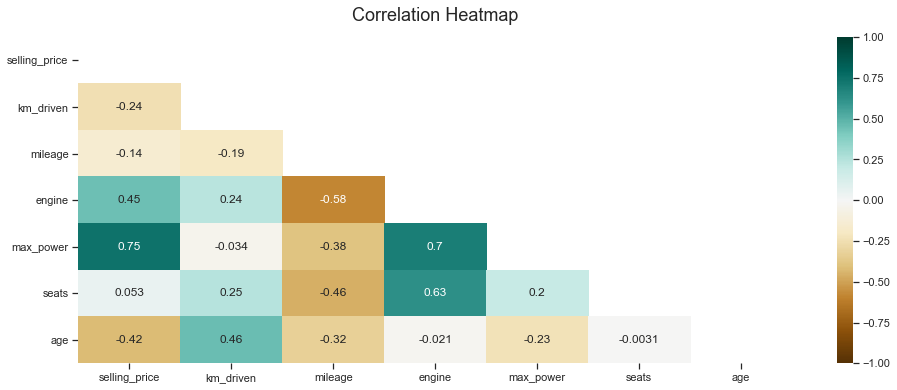

In [33]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Correlacoes muito altas entre variaveis do treino poderiam ser reduntantes, observamos que isso nao ocorre

### Analise das variaveis quantitativas



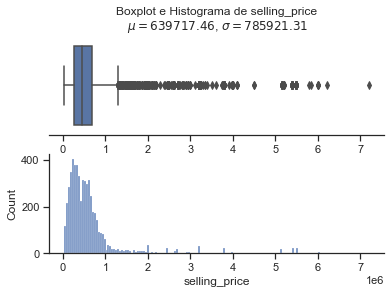

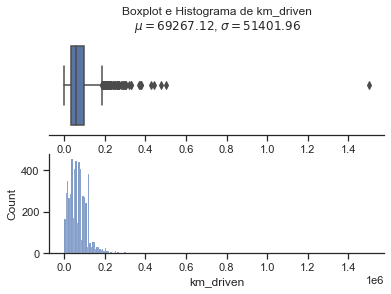

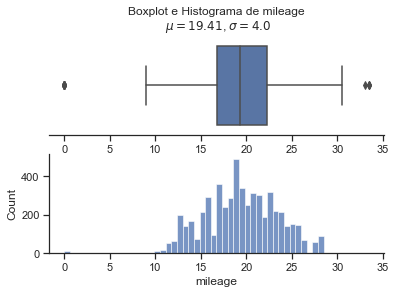

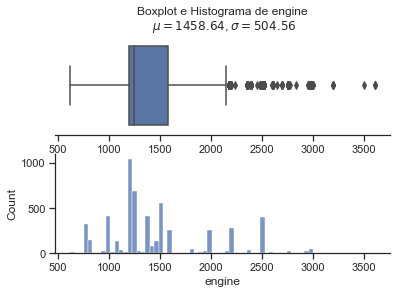

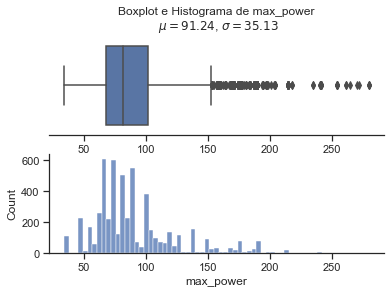

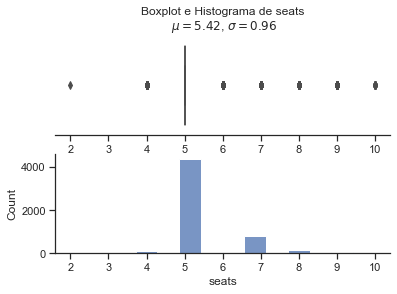

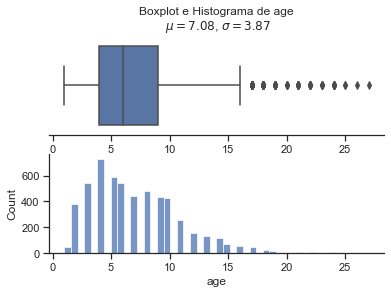

In [34]:
c = ['selling_price','km_driven','mileage','engine', 'max_power', 'seats', 'age']

for i in c:

  sns.set(style="ticks")

  x = df1[i]
  coluna = i
  mu = round(x.mean(),2) # mean of distribution
  sigma = round(x.std(),2)  # standard deviation of distribution

  f, (ax_box, ax_hist) = plt.subplots(2)

  sns.boxplot(x=x, ax=ax_box)
  sns.histplot(x=x, ax=ax_hist)

  ax_box.set(yticks=[])
  sns.despine(ax=ax_hist)
  sns.despine(ax=ax_box, left=True)
  ax_box.set_title('Boxplot e Histograma de {}\n $\mu={}$, $\sigma={}$'.format(coluna, mu,sigma))

plt.show()

Nota se que a variavel que devemos prever, selling price tem uma altissima variancia e quase todas as variaveis quantitativas possuem outliers

## Preparacao dos dados

antes de fazer a feature selection vamos normalizar e separar o que deve ser predito das variaveis <br>
duvida: deve ser normalizado antes da feature selection?

In [35]:
df1.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
1,459999,87000,1,1,1,0,20.77,1248,88.76,7.0,20,9
2,1100000,102000,1,0,0,0,19.62,1995,187.74,5.0,3,11
3,229999,212000,1,1,1,4,11.57,2179,138.10,7.0,26,12
4,800000,125000,1,1,1,2,11.50,2982,171.00,7.0,27,11
5,180000,25000,3,1,1,2,19.70,796,46.30,5.0,20,11


In [36]:
colunas = df1.iloc[:,1:].columns

In [37]:
colunas

Index(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats', 'brand', 'age'],
      dtype='object')

### Padronizacao

Vamos padronizar a base a ser predita tbm

Transformar para formato numpy para nao termos erro na normalizacao

In [59]:
data = df1.to_numpy()
nrow,ncol = df1.shape
y = data[:,:1]
X = data[:,1:]

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_train = StandardScaler()
#scaler_train = MinMaxScaler()
X = scaler_train.fit_transform(X)

#Padronizando os precos tbm
#scaler_train = StandardScaler()
#scaler_train = MinMaxScaler()
#y = scaler_train.fit_transform(y)

#Vamos padronizar o teste tbm
scaler_train = StandardScaler()
#scaler_train = MinMaxScaler()
df_test1 = scaler_train.fit_transform(df_test)

In [40]:
print(y.shape)
print(X.shape)

(5530, 1)
(5530, 11)


### Separacao treino e teste

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

## Catboost

In [43]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
 parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
model_CBR = CatBoostRegressor(logging_level='Silent')

eval_set=[(X_train, y_train), (X_test, y_test)]

In [45]:
%%time

grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 10, n_jobs=-1, scoring='r2')
grid.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10)
#grid.fit(X_train, y_train)



print("Melhor modelo: {}".format(grid.best_estimator_))
print("Melhor score: {}".format(grid.best_score_))

Melhor modelo: <catboost.core.CatBoostRegressor object at 0x0000021C7A608F10>
Melhor score: 0.9636405747742944
Wall time: 4min


In [46]:
from sklearn.metrics import r2_score
y_predict = grid.predict(X_test)

#rmse = np.sqrt(mean_squared_error(y_test,y_linear_pred))
r2 = r2_score(y_test,y_predict)
print(r2)

0.9525834925856915


## Feature Selection

https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

In [47]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

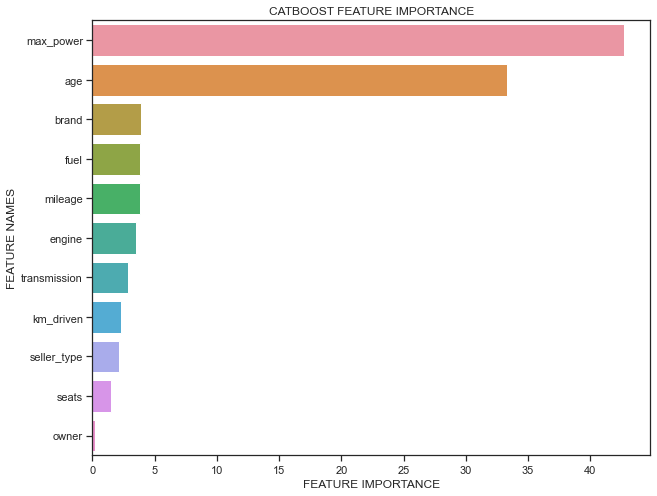

In [48]:
plot_feature_importance(grid.best_estimator_.get_feature_importance(),colunas,'CATBOOST ')

### Vamos tirar as colunas com menos importancia

In [49]:
df1.head()
c = ['owner', 'seats', 'seller_type']
df2 = df1.drop(labels = c, axis = 1)

df_test2 = df_test.drop(labels = c, axis = 1)

In [50]:
df2

,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,brand,age
1,459999,87000,1,1,20.77,1248,88.76,20,9
2,1100000,102000,1,0,19.62,1995,187.74,3,11
3,229999,212000,1,1,11.57,2179,138.10,26,12
4,800000,125000,1,1,11.50,2982,171.00,27,11
5,180000,25000,3,1,19.70,796,46.30,20,11
...,...,...,...,...,...,...,...,...,...
5684,550000,20000,3,1,18.90,1197,82.00,11,4
5685,360000,81000,1,1,19.01,1461,108.45,24,8
5686,310000,70000,1,1,19.30,1248,73.90,20,10
5687,650000,57000,1,1,23.65,1248,88.50,20,6


In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data = df2.to_numpy()
nrow,ncol = df2.shape
y = data[:,:1]
X = data[:,1:]

scaler_train = StandardScaler()
#scaler_train = MinMaxScaler()
X = scaler_train.fit_transform(X)

#Vamos padronizar o teste tbm
scaler_train = StandardScaler()
#scaler_train = MinMaxScaler()
df_test2 = scaler_train.fit_transform(df_test2)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [53]:
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
model_CBR = CatBoostRegressor()

eval_set=[(X_train, y_train), (X_test, y_test)]

In [54]:
%%time

grid = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 10, n_jobs=-1, scoring='r2')
grid.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10)
#grid.fit(X_train, y_train)

y_predict = grid.predict(X_test)

#rmse = np.sqrt(mean_squared_error(y_test,y_linear_pred))
#r2 = r2_score(y_test,y_linear_pred)

print("Melhor modelo: {}".format(grid.best_estimator_))
print("Melhor score: {}".format(grid.best_score_))

0:	learn: 725099.3360888	test: 725099.3360888	test1: 725838.2268251	best: 725838.2268251 (0)	total: 41.3ms	remaining: 4.09s
1:	learn: 667962.7502607	test: 667962.7502607	test1: 670005.4649577	best: 670005.4649577 (1)	total: 47.4ms	remaining: 2.32s
2:	learn: 618026.2240742	test: 618026.2240742	test1: 621886.9502452	best: 621886.9502452 (2)	total: 54.6ms	remaining: 1.76s
3:	learn: 570637.0627416	test: 570637.0627416	test1: 578186.2612178	best: 578186.2612178 (3)	total: 60.7ms	remaining: 1.46s
4:	learn: 527755.3300552	test: 527755.3300552	test1: 536947.9038419	best: 536947.9038419 (4)	total: 67.1ms	remaining: 1.27s
5:	learn: 490277.1990580	test: 490277.1990580	test1: 502595.3096877	best: 502595.3096877 (5)	total: 73.5ms	remaining: 1.15s
6:	learn: 453374.2521619	test: 453374.2521619	test1: 467777.7143207	best: 467777.7143207 (6)	total: 80.3ms	remaining: 1.07s
7:	learn: 420792.5779912	test: 420792.5779912	test1: 437861.6946392	best: 437861.6946392 (7)	total: 90.2ms	remaining: 1.04s
8:	learn

70:	learn: 112807.8812827	test: 112807.8812827	test1: 171750.1811411	best: 171750.1811411 (70)	total: 587ms	remaining: 240ms
71:	learn: 112486.8281573	test: 112486.8281573	test1: 171731.0786620	best: 171731.0786620 (71)	total: 594ms	remaining: 231ms
72:	learn: 111984.3409624	test: 111984.3409624	test1: 171211.1273708	best: 171211.1273708 (72)	total: 600ms	remaining: 222ms
73:	learn: 111271.7262892	test: 111271.7262892	test1: 171116.4885800	best: 171116.4885800 (73)	total: 607ms	remaining: 213ms
74:	learn: 110412.4742720	test: 110412.4742720	test1: 170661.2066491	best: 170661.2066491 (74)	total: 613ms	remaining: 204ms
75:	learn: 109833.7743343	test: 109833.7743343	test1: 170522.0560090	best: 170522.0560090 (75)	total: 621ms	remaining: 196ms
76:	learn: 109327.5292193	test: 109327.5292193	test1: 170162.1461219	best: 170162.1461219 (76)	total: 629ms	remaining: 188ms
77:	learn: 108938.8797941	test: 108938.8797941	test1: 170065.9735423	best: 170065.9735423 (77)	total: 637ms	remaining: 180ms


## Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [56]:
%%time

parameters = {'max_depth':[4], 'learning_rate':[0.02],
             "n_estimators":[3000], "loss":["ls"], 
              "criterion":["friedman_mse"]}

grb_model = GridSearchCV(GradientBoostingRegressor(), parameters,
                    cv = 10, scoring = "r2", n_jobs = -1, verbose = 3,
                    refit = True)

grb_model.fit(X_train, y_train.ravel())
y_pred_train = grb_model.predict(X_train)


print("Melhor modelo: {}".format(grb_model.best_estimator_))
print("Melhor score: {}".format(grb_model.best_score_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Melhor modelo: GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=3000)
Melhor score: 0.973730974769129
Wall time: 1min 43s


## Submetendo a predicao

In [57]:
y_pred = grid.best_estimator_.predict(df_test2)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['Id'] = Id
prediction['selling_price'] = y_pred

prediction.to_csv('catboost2.csv', index = False)

In [58]:
prediction.head(10)

,Id,selling_price
0,1,193067
1,2,556582
2,3,616575
3,4,1429865
4,5,554934
5,6,457523
6,7,652911
7,8,1964215
8,9,2390847
9,10,512478
